# `contour_map`

A nod to Sanders' `contour_bin` routine  [arXiv:astro-ph/0606528](https://arxiv.org/abs/astro-ph/0606528) . Uses [`dmimglasso`](http://cxc.harvard.edu/ciao/ahelp/dmimglasso.html) to generate a contour around the max value down to next lowest value in the contour grid. Uses a maximum radius criteria to prevent thin, long “fingers”. Repeats until all pixels are included.

This routine works best with a smoothed input image.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Mon Jan 21 15:24:28 EST 2019


In [2]:
# Routine to display images using ds9 in notebook
display_map()
{
img=$1
map=$2
png=$3
reg=$4

if test x${reg} == x
then
  region=""
else
  region="-region $reg"
fi


ds9 -geom 1550x824 -scale asinh -scale limits 0 200 \
  -zoom 2 -cmap load sunset-in-atlantis.sao  \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  $img \
  -frame new -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
  $map -scale linear -scale mode minmax \
  $region -regions select all -regions color black -regions select none \
  -tile yes \
  -saveimage png $png -exit 

display < $png
}

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example 1

Create upto 100 contour levels from the min pixel value to the max
pixel value, spaced logarithmatically.  The contours are resticted to
stay within a 500 physical pixel radius circle of the starting point, and at most 150 contours will be created.

The `contour_map` behaves best when the input image is smoothed.  Here we use the input image which 
was smoothed with a 3pixels $\sigma$ Gaussina.


In [4]:
contour_map infile=smimg.fits outfile=cbin.map binimg=cbin.img \
  distance=500 shape=circle nlevels=100 scale=log maxcontours=150 \
  verbose=1 clobber=yes  

contour_map
          infile = smimg.fits
         outfile = cbin.map
          binimg = cbin.img
        distance = 500
           shape = circle
          levels = 
         nlevels = 100
           scale = log
     maxcontours = 150
         verbose = 1
         clobber = yes
            mode = ql

Contour lower limit: 90.05286173188391
Contour lower limit: 64.34516384838473
Contour lower limit: 45.97633024703298
Contour lower limit: 45.97633024703298
Contour lower limit: 32.85131028596014
Contour lower limit: 32.85131028596014
Contour lower limit: 23.473134582638327
Contour lower limit: 23.473134582638327
Contour lower limit: 23.473134582638327
Contour lower limit: 23.473134582638327
Contour lower limit: 23.473134582638327
Contour lower limit: 16.77217871489688
Contour lower limit: 16.77217871489688
Contour lower limit: 16.77217871489688
Contour lower limit: 16.77217871489688
Contour lower limit: 16.77217871489688
Contour lower limit: 16.77217871489688
Contour lower limit: 16.77217

### `map2reg`

`map2reg` is a little utility to convert maps into region files.  it can be incredibly slow.  Really all I'm
using if for here is to improve the visualization of the map regions.

In [5]:
map2reg cbin.map cbin.reg clob+

dmcopy cbin.reg"[shape=Polygon]" cbin_a.reg clob+

map2reg
          infile = cbin.map
         outfile = cbin.reg
         verbose = 1
         clobber = yes
            mode = ql

39.0
1.0
76.0
113.0
114.0
77.0
40.0
2.0
115.0
78.0
41.0
3.0
116.0
79.0
42.0
4.0
117.0
80.0
43.0
5.0
118.0
81.0
44.0
6.0
119.0
82.0
7.0
45.0
83.0
8.0
120.0
46.0
9.0
84.0
121.0
47.0
10.0
85.0
122.0
48.0
86.0
123.0
11.0
49.0
87.0
50.0
124.0
12.0
88.0
51.0
13.0
125.0
89.0
14.0
52.0
126.0
90.0
15.0
127.0
53.0
91.0
16.0
54.0
128.0
92.0
55.0
17.0
129.0
56.0
18.0
93.0
130.0
19.0
94.0
57.0
131.0
20.0
95.0
58.0
132.0
21.0
96.0
133.0
59.0
22.0
97.0
60.0
134.0
23.0
98.0
61.0
135.0
24.0
99.0
62.0
136.0
25.0
100.0
63.0
137.0
26.0
64.0
101.0
138.0
102.0
65.0
27.0
139.0
103.0
66.0
28.0
140.0
104.0
67.0
29.0
141.0
105.0
68.0
142.0
30.0
106.0
69.0
31.0
143.0
107.0
32.0
70.0
144.0
108.0
33.0
71.0
145.0
34.0
109.0
72.0
146.0
35.0
73.0
147.0
110.0
36.0
148.0
111.0
74.0
37.0
149.0
112.0
75.0
38.0
150.0


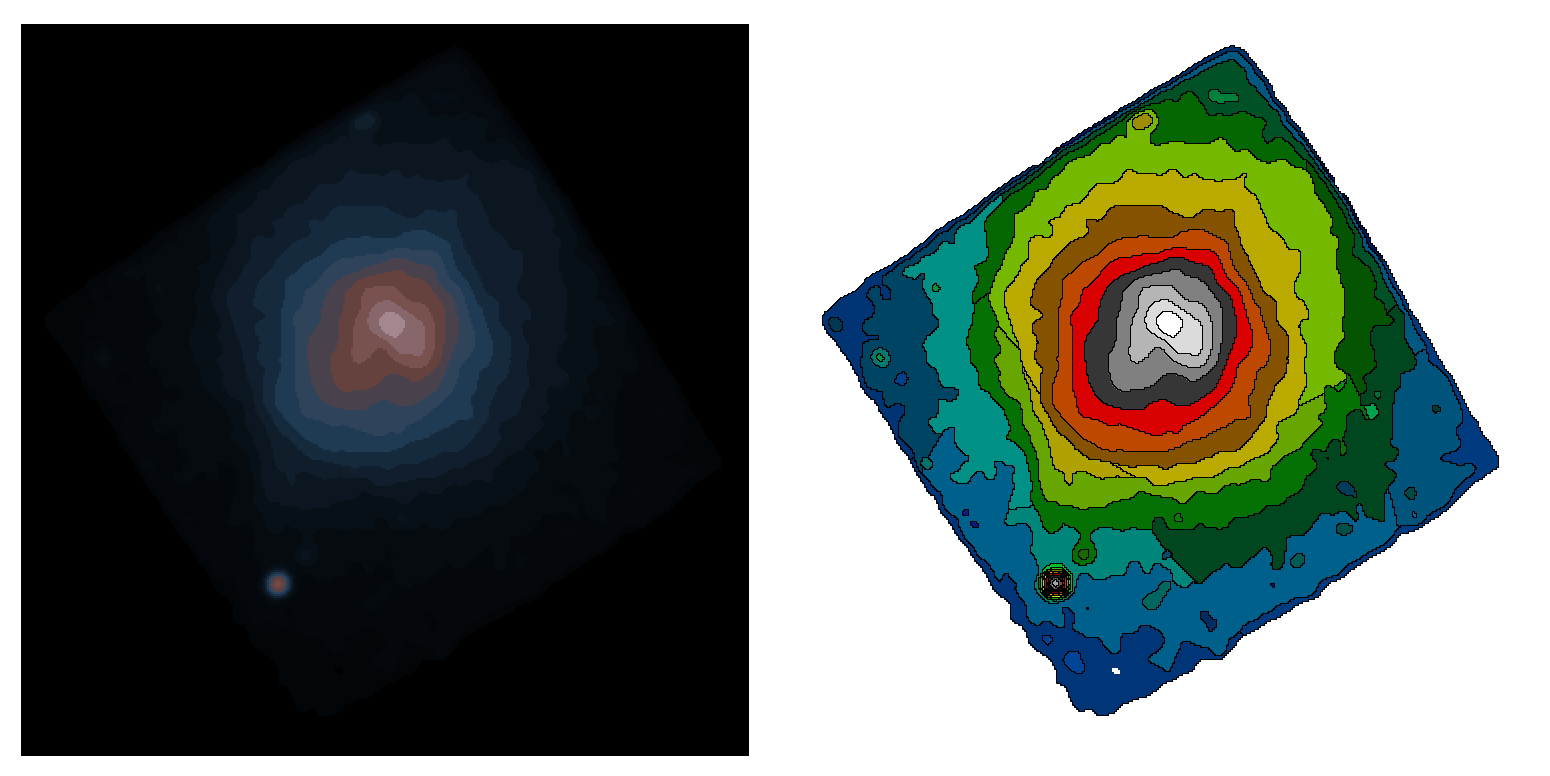

In [6]:
display_map cbin.img cbin.map cbin.png cbin_a.reg

Because we choose a maximum of 150 contours parts of the image are ungrouped.  There are many small groups around the bright point-like source.

This algorithm works better when the input is heavily smoothed, or when point-like source have been filled.

## Example 2


The algorithm to pick the contour levels is a bit finiky.  Users can also select the specific contour levels 
themselves.


In [7]:
contour_map infile=smimg.fits outfile=cbin2.map binimg=cbin2.img \
  distance=500 shape=circle levels="1,2,4,6,8,12,20,30,45,62" \
  maxcontours=150 \
  verbose=1 clobber=yes  

contour_map
          infile = smimg.fits
         outfile = cbin2.map
          binimg = cbin2.img
        distance = 500
           shape = circle
          levels = 1,2,4,6,8,12,20,30,45,62
         nlevels = 20
           scale = log
     maxcontours = 150
         verbose = 1
         clobber = yes
            mode = ql

Contour lower limit: 62.0
Contour lower limit: 45.0
Contour lower limit: 45.0
Contour lower limit: 30.0
Contour lower limit: 30.0
Contour lower limit: 20.0
Contour lower limit: 20.0
Contour lower limit: 20.0
Contour lower limit: 20.0
Contour lower limit: 20.0
Contour lower limit: 20.0
Contour lower limit: 20.0
Contour lower limit: 12.0
Contour lower limit: 12.0
Contour lower limit: 12.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour lower limit: 8.0
Contour

In [8]:
map2reg cbin2.map cbin2.reg clob+

dmcopy cbin2.reg"[shape=Polygon]" cbin2_a.reg clob+

map2reg
          infile = cbin2.map
         outfile = cbin2.reg
         verbose = 1
         clobber = yes
            mode = ql

1.0
25.0
71.0
48.0
72.0
2.0
26.0
49.0
73.0
27.0
3.0
50.0
74.0
28.0
4.0
51.0
75.0
5.0
52.0
29.0
53.0
76.0
6.0
30.0
54.0
77.0
7.0
31.0
55.0
78.0
8.0
32.0
56.0
79.0
9.0
33.0
57.0
80.0
10.0
34.0
58.0
11.0
81.0
35.0
82.0
12.0
59.0
36.0
83.0
13.0
60.0
37.0
84.0
14.0
61.0
38.0
15.0
85.0
62.0
39.0
16.0
86.0
63.0
40.0
17.0
64.0
87.0
41.0
18.0
65.0
88.0
42.0
66.0
19.0
43.0
89.0
67.0
20.0
44.0
90.0
68.0
21.0
45.0
91.0
69.0
22.0
46.0
92.0
70.0
23.0
47.0
93.0
24.0
94.0


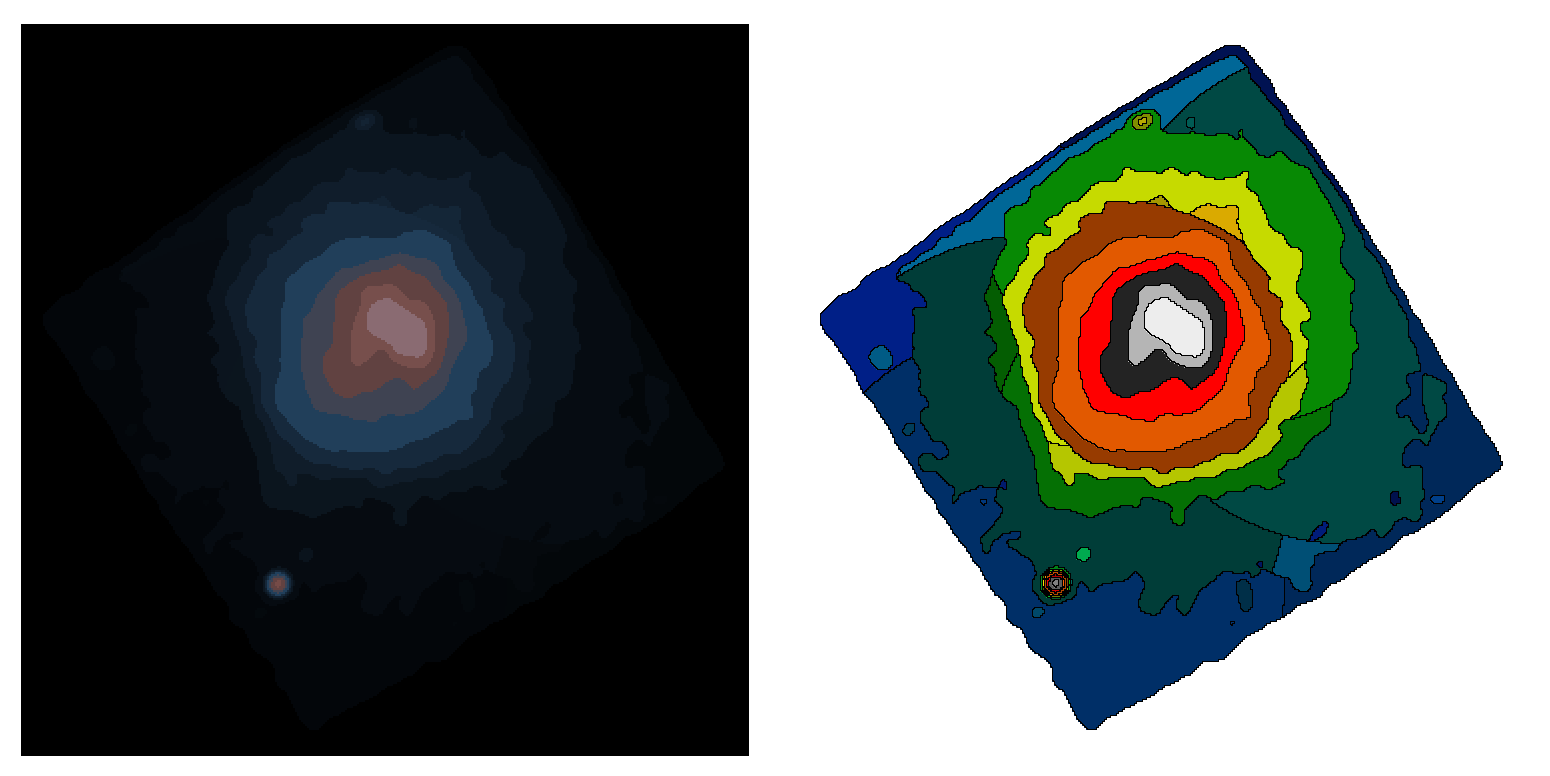

In [9]:
display_map cbin2.img cbin2.map cbin2.png cbin2_a.reg